In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

In [2]:
student_data = pd.read_csv('student-mat.csv',sep=";")

In [3]:
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
student_data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [5]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

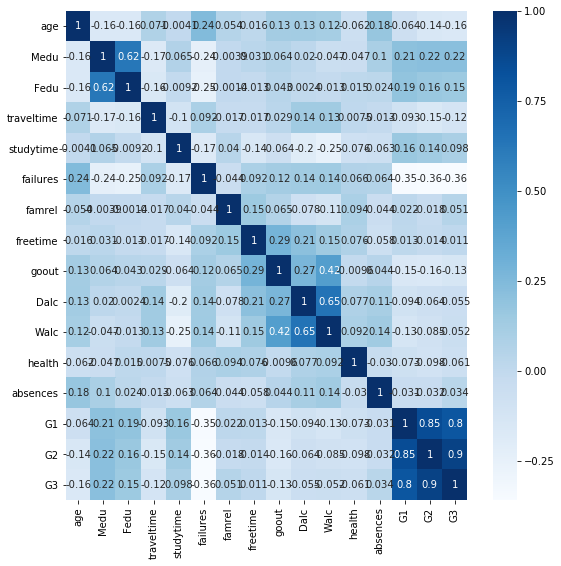

In [6]:
plt.figure(figsize = (9,9))
sns.heatmap(student_data.corr(),cmap = 'Blues',annot = True)

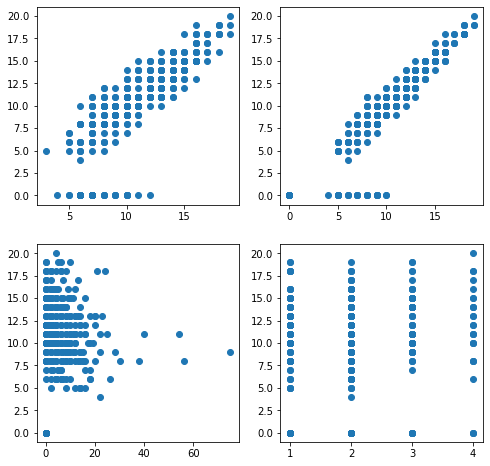

In [7]:
fig,axs = plt.subplots(2,2,figsize=(8,8))
axs[0,0].scatter(student_data['G1'],student_data['G3'])
axs[0,1].scatter(student_data['G2'],student_data['G3'])
axs[1,0].scatter(student_data['absences'],student_data['G3'])
axs[1,1].scatter(student_data['studytime'],student_data['G3'])

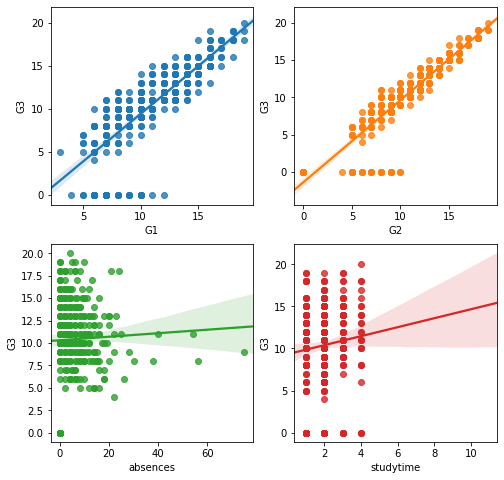

In [8]:
fig,axs = plt.subplots(2,2,figsize=(8,8))
sns.regplot(student_data['G1'],student_data['G3'],ax = axs[0,0])
sns.regplot(student_data['G2'],student_data['G3'],ax = axs[0,1])
sns.regplot(student_data['absences'],student_data['G3'],ax = axs[1,0])
sns.regplot(student_data['studytime'],student_data['G3'],ax = axs[1,1])

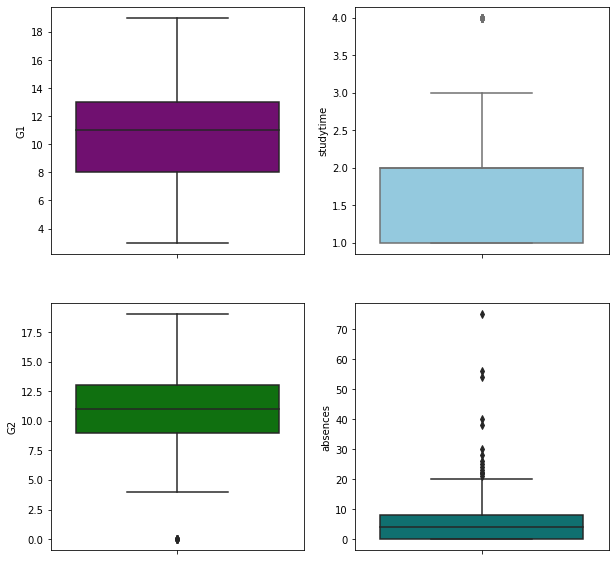

In [9]:
fig,axs = plt.subplots(2,2,figsize = (10,10))
sns.boxplot(student_data['G1'],orient='v',ax = axs[0,0],color = 'purple')
sns.boxplot(student_data['G2'],orient='v',ax = axs[1,0],color = 'green')
sns.boxplot(student_data['studytime'],orient='v',ax = axs[0,1],color = 'skyblue')
sns.boxplot(student_data['absences'],orient='v',ax = axs[1,1],color = 'teal')

In [10]:
data = student_data[["G1","G2","G3"]]

In [11]:
X = data.drop(['G3'],1)

In [12]:
Y = data[['G3']]

In [13]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [14]:
X,xtest,Y,ytest = train_test_split(X,Y,test_size = 0.1)

In [15]:
model = linear_model.LinearRegression()

In [16]:
model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
acc = model.score(xtest,ytest)

In [18]:
acc

0.9423470177472978

In [19]:
print(model.coef_)
print(model.intercept_)

[[0.15832955 0.98533537]]
[-1.89490075]
